In [2]:
import serial
import time
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd
import threading

In [44]:
def response_mtb(ser_MTB):
    response = b""
    while True:
        char = ser_MTB.read()
        if char == b'\r':
            break
        response += char
    dec_response = response.decode().strip()
    return dec_response

def send_command_mtb(ser_MTB,comm):
    time.sleep(0.2)
    ser_MTB.write((comm + "\r").encode())  # Ensure each command ends with CR

def send_command_response_mtb(ser_MTB,comm):
    send_command_mtb(ser_MTB,comm)
    return response_mtb(ser_MTB)


def response_ard(ser_ard):
    response = b""
    while True:
        char = ser_ard.read()
        if char == b'\r':
            break
        response += char
    dec_response = response.decode().strip()
    return dec_response

def sample(ser_ard):
    ser_ard.write(("Sample" + "\n").encode())  # Ensure each command ends with CR

def read_and_write_data(file_path, ser, stop_event):
    print("Writing thread started.")
    with open(file_path, "w") as file:
        while not stop_event.is_set():
            line = response_ard(ser)
            file.write(line + "\n")
            file.flush()  # Ensure data is written immediately
    print("Writing thread stopped.")

def check_condition(ser_MTB, stop_event):
    while send_command_response_mtb(ser_MTB, "s") != "s12" and not stop_event.is_set():
        time.sleep(0.25)  # Adjust sleep time as needed
    print("Condition met. Stopping writing thread.")
    stop_event.set()


def record_serial_data(port, baud_rate,amps,itter):
    try:
        ser = serial.Serial(port, baud_rate,timeout=1)
        ser.setDTR(False)
        time.sleep(1)
        ser.flushInput()
        ser.setDTR(True)
        print("Serial port opened successfully.")
        # Open serial port MTB
        ser_MTB = serial.Serial(port_MTB, baud_rate_MTB, bytesize=bytesize_MTB, parity=parity_MTB, stopbits=stopbits_MTB, timeout=1)
        print("MTB Serial port opened successfully.")

        while send_command_response_mtb(ser_MTB,"s") != "S0":
            send_command_mtb(ser_MTB,"S0")
        
        print(send_command_response_mtb(ser_MTB,"V00.00"))
        temp_str = amps.split("_")
        command = "I" + str(temp_str[0]) + "." + str(temp_str[1])
        print(send_command_response_mtb(ser_MTB,command))
        print(send_command_response_mtb(ser_MTB,"S1"))
        time.sleep(1)
        print(send_command_response_mtb(ser_MTB,"s"))
    
        # Alter the file name with the iteration value and the current value
        new_file_name = f"{amps}A_{itter}.csv"
        # Construct the full path to the file within the "samples" directory
        file_path = os.path.join(samples_directory, new_file_name)

        # Create an Event object to signal when to stop the writing thread
        stop_event = threading.Event()

        # Start the writing thread
        sample(ser)
        write_thread = threading.Thread(target=read_and_write_data, args=(file_path, ser, stop_event))
        write_thread.start()

        # Start the condition checking thread
        condition_thread = threading.Thread(target=check_condition, args=(ser_MTB, stop_event))
        condition_thread.start()

        # Once the condition is met, wait for the writing thread to finish
        write_thread.join()

        # Wait for the condition checking thread to finish
        condition_thread.join()

    
        print("Done.")

    except serial.SerialException as e:
        print(f"Serial port error: {e}")
    finally:
        if ser.is_open:
            ser.close()
            ser_MTB.close()
            print("Serial port closed.")

if __name__ == "__main__":

    # Define serial port settings
    port_MTB = "COM21"  # Change this to your serial port
    baud_rate_MTB = 2400
    bytesize_MTB = serial.EIGHTBITS
    parity_MTB = serial.PARITY_NONE
    stopbits_MTB = serial.STOPBITS_TWO  # Set to two stop bits
    
    

    current_value_amps = "25_48"

    # Create a directory called "samples" if it doesn't exist
    samples_directory = "samples/" + str(current_value_amps)
    if not os.path.exists(samples_directory):
        os.makedirs(samples_directory)
    
    # COM port and baud rate settings
    port = "COM26"
    baud_rate = 115200

    # Record serial data
    
    record_serial_data(port, baud_rate,current_value_amps,5)


Serial port opened successfully.
MTB Serial port opened successfully.
s0
V  0.0
I25.48
S1
Writing thread started.


File path: samples/25_48/25_48A_0.csv
File name: 25_48A_0.csv
Signal Frequency: 50.008703220191464 Hz
Sample Frequency: 1473.3333333333333 Hz
Model Function
y = -0.23x + 35.89
Model Function from first 5s of data
y = -0.25x + 36.14
Predicted Trip Time(s): 29.956521739130437
Actual Trip Time(s): 29.114253393665162
Difference between predicted and actual: 0.8422683454652748


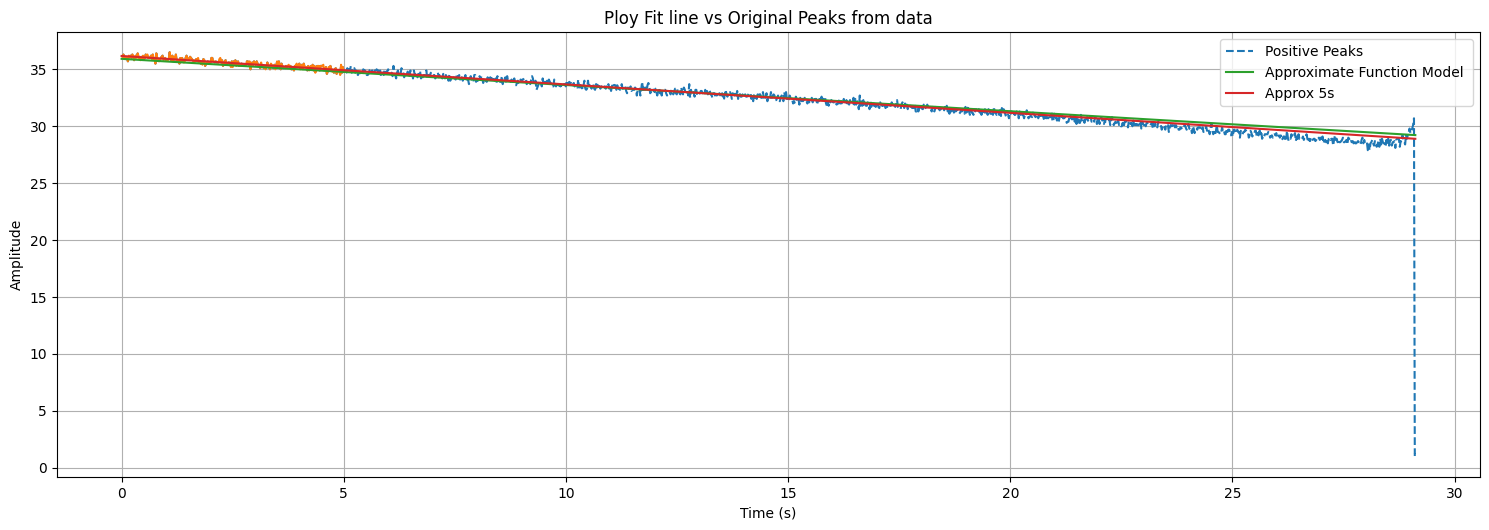

File path: samples/25_48/25_48A_1.csv
File name: 25_48A_1.csv
Signal Frequency: 50.03639291465378 Hz
Sample Frequency: 1473.3333333333333 Hz
Model Function
y = -0.23x + 35.89
Model Function from first 5s of data
y = -0.25x + 36.05
Predicted Trip Time(s): 29.956521739130437
Actual Trip Time(s): 28.098868778280547
Difference between predicted and actual: 1.8576529608498902


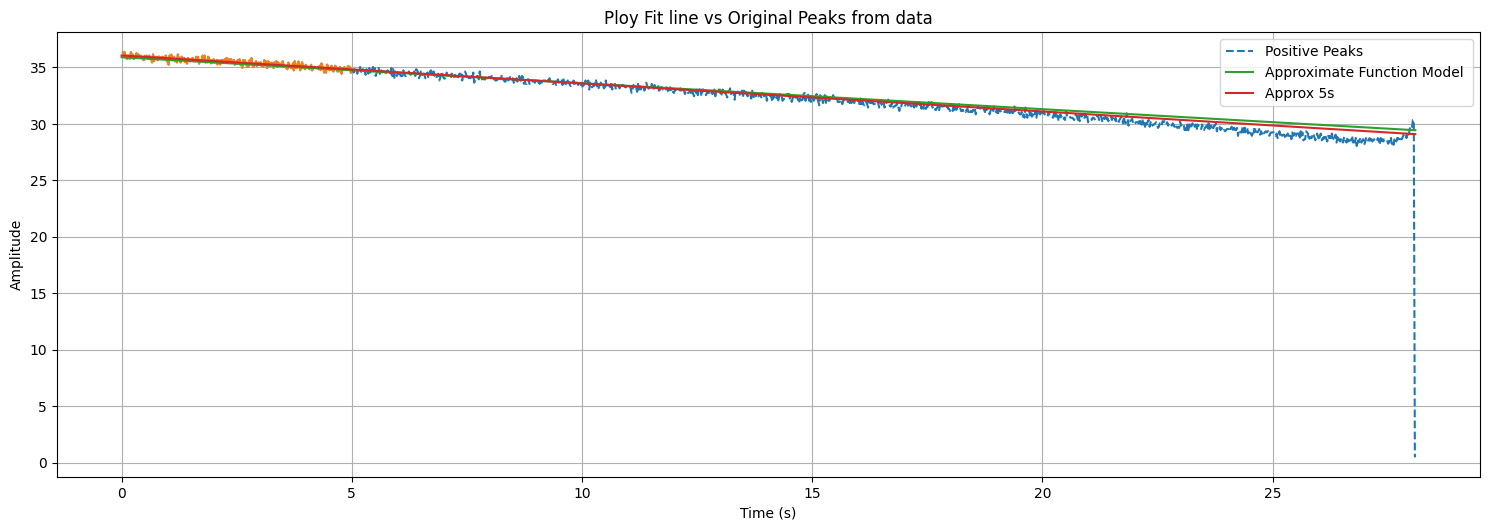

File path: samples/25_48/25_48A_2.csv
File name: 25_48A_2.csv
Signal Frequency: 50.01131477709889 Hz
Sample Frequency: 1473.3333333333333 Hz
Model Function
y = -0.23x + 35.89
Model Function from first 5s of data
y = -0.27x + 36.12
Predicted Trip Time(s): 29.956521739130437
Actual Trip Time(s): 27.99298642533937
Difference between predicted and actual: 1.9635353137910663


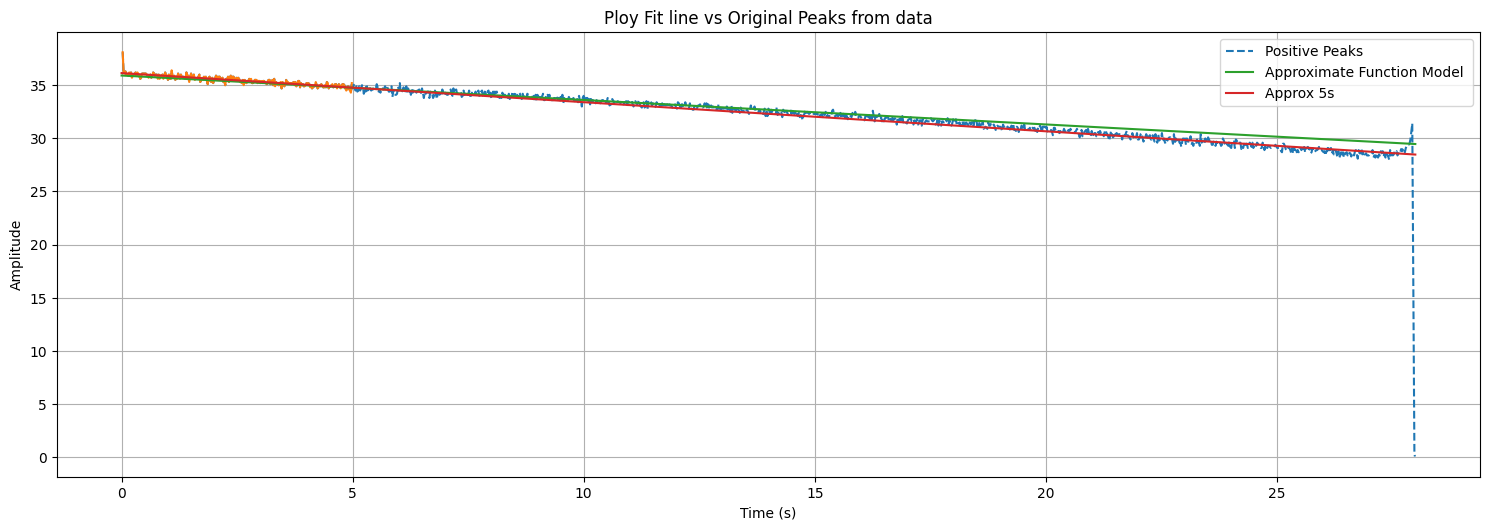

File path: samples/25_48/25_48A_3.csv
File name: 25_48A_3.csv
Signal Frequency: 50.01520589710933 Hz
Sample Frequency: 1473.3333333333333 Hz
Model Function
y = -0.23x + 35.89
Model Function from first 5s of data
y = -0.24x + 35.99
Predicted Trip Time(s): 29.956521739130437
Actual Trip Time(s): 29.310407239819007
Difference between predicted and actual: 0.6461144993114303


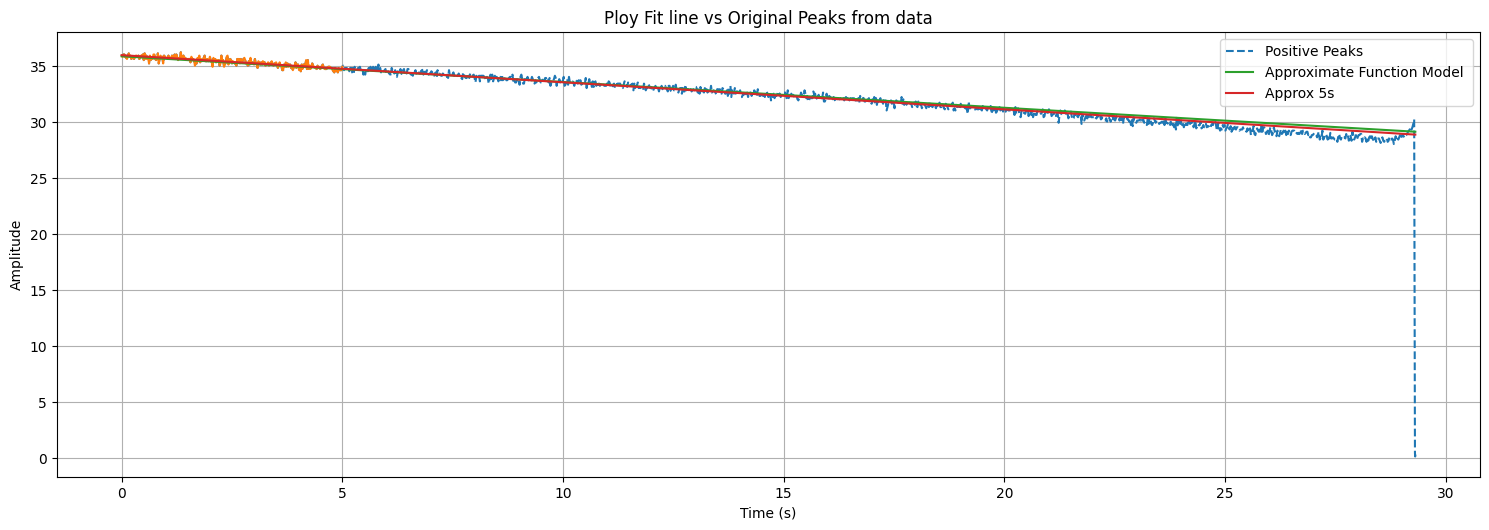

File path: samples/25_48/25_48A_4.csv
File name: 25_48A_4.csv
Signal Frequency: 50.24734647460197 Hz
Sample Frequency: 1480.0 Hz
Model Function
y = -0.23x + 35.89
Model Function from first 5s of data
y = -0.25x + 35.99
Predicted Trip Time(s): 29.956521739130437
Actual Trip Time(s): 28.518243243243244
Difference between predicted and actual: 1.438278495887193


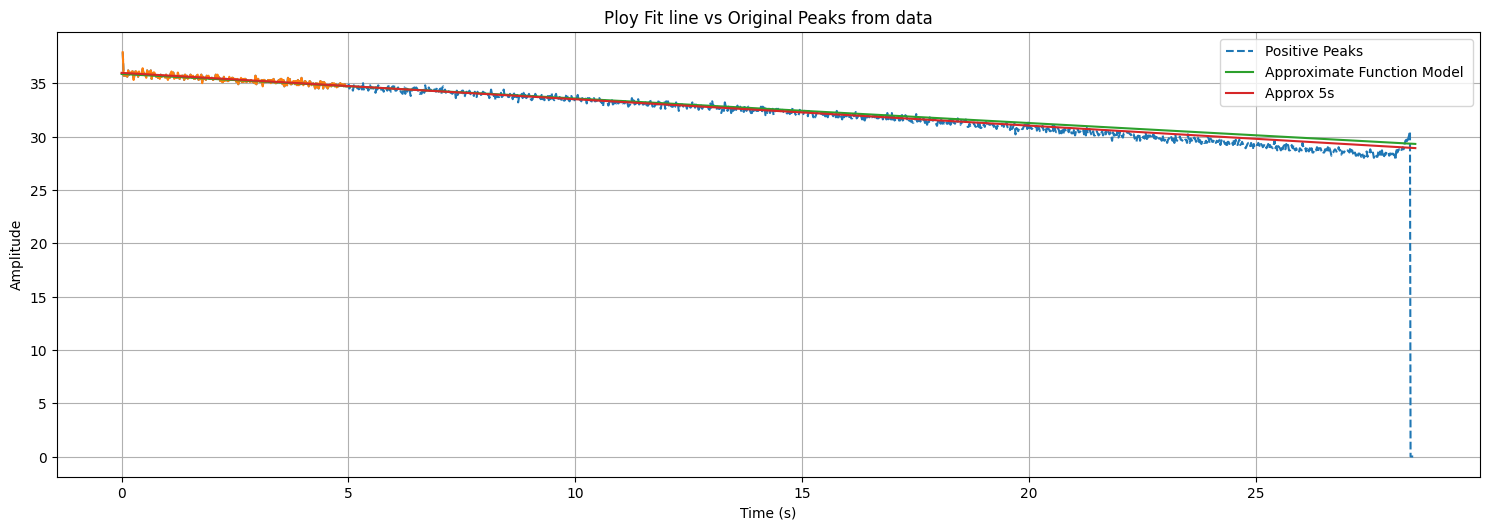

Average Difference: 1.349569923060971
Max Difference: 1.9635353137910663
Min Difference: 0.6461144993114303


In [43]:

# Directory to scan
directory = "samples/25_48/"


m = -0.23
c = 35.89

# List to store file paths and names
file_paths = []
diff_times = []
# Scan the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

# Print the file paths and names
for file_path in file_paths:
    print("File path:", file_path)
    print("File name:", os.path.basename(file_path))
    # Split the file name into parts based on "_" and "."
    parts = os.path.basename(file_path).split("_")
    parts[1] = parts[1].strip("A")
    current = float(str(parts[0]) + "."+str(parts[1]))

    datafile = "Iteration_" + parts[2].strip(".csv") # Join the remaining parts with "_"

    df = pd.read_csv(file_path) #read the data from the file into a pandas df object
    data = df.iloc[:, 0].values #convert the data into 1D numpy array


    max_index = np.argmax(data)
    min_index = np.argmin(data[max_index:])

    data = data[max_index:]
    
    peaks_data, _ = find_peaks(data,height = np.mean(data),distance=4)

    peaks_below_threshold = peaks_data[data[peaks_data] < 540][2]

    data = data[:peaks_below_threshold]


    peaks_data, _ = find_peaks(data[0:500],height = np.mean(data),distance=4)
    peak_diff = np.mean(np.diff(peaks_data))

    signal_freq = 50
    # Sample rate (in Hz)
    sample_rate = signal_freq*peak_diff
    t = np.arange(0, len(data), 1)
    t = t*(1/sample_rate)

    # Perform FFT
    fft_result1 = np.fft.fft((data - np.mean(data))/np.max(data))
    fft_freq = np.fft.fftfreq(len(data), 1/sample_rate)

    # Extract the positive side of the FFT result
    fft_result1 = fft_result1[:len(fft_result1)//2]
    fft_freq = fft_freq[:len(fft_freq)//2]

    # find the index of the max value of the fft result
    max_index = np.argmax(fft_result1)

    print("Signal Frequency:",fft_freq[max_index] ,"Hz")
    print("Sample Frequency:",sample_rate,"Hz")


    # plt.figure(figsize=(15, 10))

    # # Plot the original signal - Sensor 1
    # plt.subplot(2, 2, 1)
    # plt.plot(t, data)
    # plt.xlim(0, t[-1])  # Show frequencies up to Nyquist frequency
    # plt.title(str(current)+"A"+" "+ datafile + " Original Signal")
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')


    # # Plot the original signal - 50 bins
    # plt.subplot(2, 2, 2)
    # plt.plot(t[0:500], data[0:500])
    # plt.title('Original Signal - 500 Bins')
    # plt.plot(t[peaks_data], data[peaks_data],'X')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')

    # # Plot the FFT result on a logarithmic scale
    # plt.subplot(2, 1, 2)
    # plt.semilogy(fft_freq, np.abs(fft_result1))
    # plt.title('FFT Result-'+str(current)+"A"+" "+ datafile + " Original Signal")
    # plt.xlabel('Frequency (Hz)')
    # plt.ylabel('Magnitude (log scale)')
    # plt.xlim(0, sample_rate / 2)  # Show frequencies up to Nyquist frequency
    # plt.ylim(10**-2,np.abs(fft_result1[max_index]))
    # plt.xticks(np.arange(0, sample_rate / 2 + 1, 50))  # Set frequency ticks to 50 Hz
    # plt.grid()

    # plt.tight_layout()
    # plt.show()

    # Find the peaks in the signal using find_peaks
    peaks, _ = find_peaks(data,height = np.mean(data),distance=4)


    # Plot the original signal
    # plt.figure(figsize=(15, 10))
    # plt.subplot(2, 1, 1)
    # plt.plot(t, data,label='Original Signal')
    # plt.plot(t[peaks], data[peaks], '--', label='Positive Peaks')
    # plt.title(str(current)+"A"+" "+ datafile + " Original Signal")
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')
    # plt.legend()
    # plt.grid()

    # plt.tight_layout()
    # plt.show()

    data = data - np.mean(data)

    test_time = t[peaks]
    test_values = data[peaks]


    indices = np.where(test_time < 5)[0]

    t_below = test_time[indices]
    y_below = test_values[indices]
    
    z = np.polyfit(t_below, y_below, 1)

    fun_aprox = t*m + c
    fun_aprox_5s = z[0] * t + z[1]
    print("Model Function")
    print(f"y = {m:.2f}x + {c:.2f}")
    print("Model Function from first 5s of data")
    print(f"y = {z[0]:.2f}x + {z[1]:.2f}")
 
    y_int = 29
    prediction_time = (y_int - c)/m

    print("Predicted Trip Time(s):",prediction_time)
    print("Actual Trip Time(s):",t[-1])
    diff = np.abs(prediction_time - t[-1])
    print("Difference between predicted and actual:",diff)

    diff_times.append(diff)

    #Plot the original signal
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    plt.plot(t[peaks], data[peaks], '--', label='Positive Peaks')
    plt.plot(test_time[indices],test_values[indices])
    plt.plot(t, fun_aprox,label='Approximate Function Model ')
    plt.plot(t, fun_aprox_5s,label='Approx 5s')
    plt.title("Ploy Fit line vs Original Peaks from data")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


print("Average Difference:",np.mean(diff_times))
print("Max Difference:",np.max(diff_times))
print("Min Difference:",np.min(diff_times))

# plt.figure(figsize=(15, 10))

# # Replace these plot calls with histogram calls
# plt.hist(diff_times, bins=5, alpha=1.0, color='b', label='Positive Peaks')
# plt.title("Histogram of Peaks and Test Values")
# plt.xlabel('Amplitude')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid()

# plt.tight_layout()
# plt.show()




